<a href="https://colab.research.google.com/github/Devansh-Jain1/Campaign-Finance-Analytics/blob/main/Political_Campaign_Fund_Analysis%201999-2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preparation and Cleaning**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dfs = []

filepath = [
    ('/content/weball26.txt', 2025),
    ('/content/weball24.txt', 2023),
    ('/content/weball22.txt', 2021),
    ('/content/weball20.txt', 2019),
    ('/content/weball18.txt', 2017),
    ('/content/weball16.txt', 2015),
    ('/content/weball14.txt', 2013),
    ('/content/weball12.txt', 2011),
    ('/content/weball10.txt', 2009),
    ('/content/weball08.txt', 2007),
    ('/content/weball06.txt', 2005),
    ('/content/weball04.txt', 2003),
    ('/content/weball02.txt', 2001),
    ('/content/weball00.txt', 1999)
]


for file, year in filepath:

    df = pd.read_csv(file, sep='|', header=None)

    df['Year'] = year

    dfs.append(df)

twenty_yeardf = pd.concat(dfs) #Large data set concacted with all the data from 1999-2024 from FEC website

financial_columns = [0, 1, 4, 'Year']
numerical_columns = [6, 10, 11, 12, 28, 29, 17]

all_columns = financial_columns + numerical_columns  # Merge candidate info and numeric columns

financial_df = twenty_yeardf[all_columns].copy()
financial_df[numerical_columns] = financial_df[numerical_columns].apply(pd.to_numeric, errors='coerce')#typecast to int
financial_df[numerical_columns] = financial_df[numerical_columns].fillna(0)# Replace NaN values in numerical columns with 0

print(financial_df.head())






           0                   1    4  Year    6       10   11   12   28   29  \
0  H4AL07104  LITAKER, ROBIN DR.  REP  2025  0.0     0.00  0.0  0.0  0.0  0.0   
1  H4AZ03141  WOOTEN, DUANE M MD  DEM  2025  0.0  3583.13  0.0  0.0  0.0  0.0   
2  H2AZ09191       COOPER, KELLY  REP  2025  0.0     0.00  0.0  0.0  0.0  0.0   
3  H4AZ08132       KERN, ANTHONY  REP  2025  0.0     0.00  0.0  0.0  0.0  0.0   
4  H4CA12196      TRAN, JENNIFER  DEM  2025  0.0     0.00  0.0  0.0  0.0  0.0   

    17  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  


# **Analysis and Visualization**

Candidate who refunded the most money:
              0                                                1    4  Year  \
3293  P20003851                        ELGAR, MISS BETSY PAULINE  CON  2019   
2055  P00003392                          CLINTON, HILLARY RODHAM  DEM  2007   
3240  P80000722                               BIDEN, JOSEPH R JR  DEM  2019   
3285  P80001571                                 TRUMP, DONALD J.  REP  2019   
3083  P00009423                                   HARRIS, KAMALA  DEM  2023   
3106  P80000722                               BIDEN, JOSEPH R JR  DEM  2023   
2637  P80003338                                    OBAMA, BARACK  DEM  2011   
2100  P80002801                                  MCCAIN, JOHN S.  REP  2007   
2087  P00003251                             GIULIANI, RUDOLPH W.  REP  2007   
2216  P00003392  CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE  DEM  2015   

                 6            10            11          12            28  \
3293  0.000000e

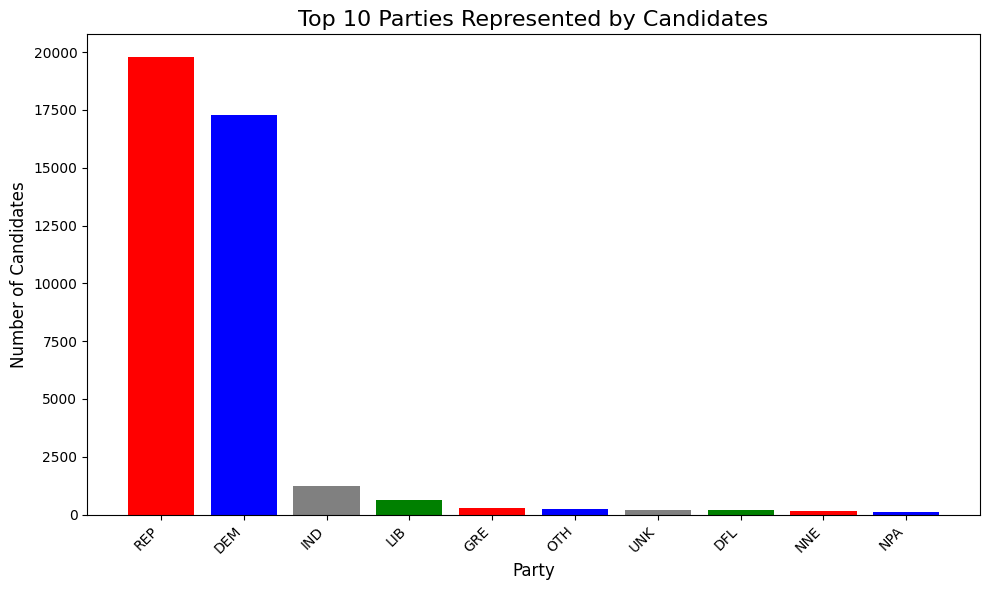

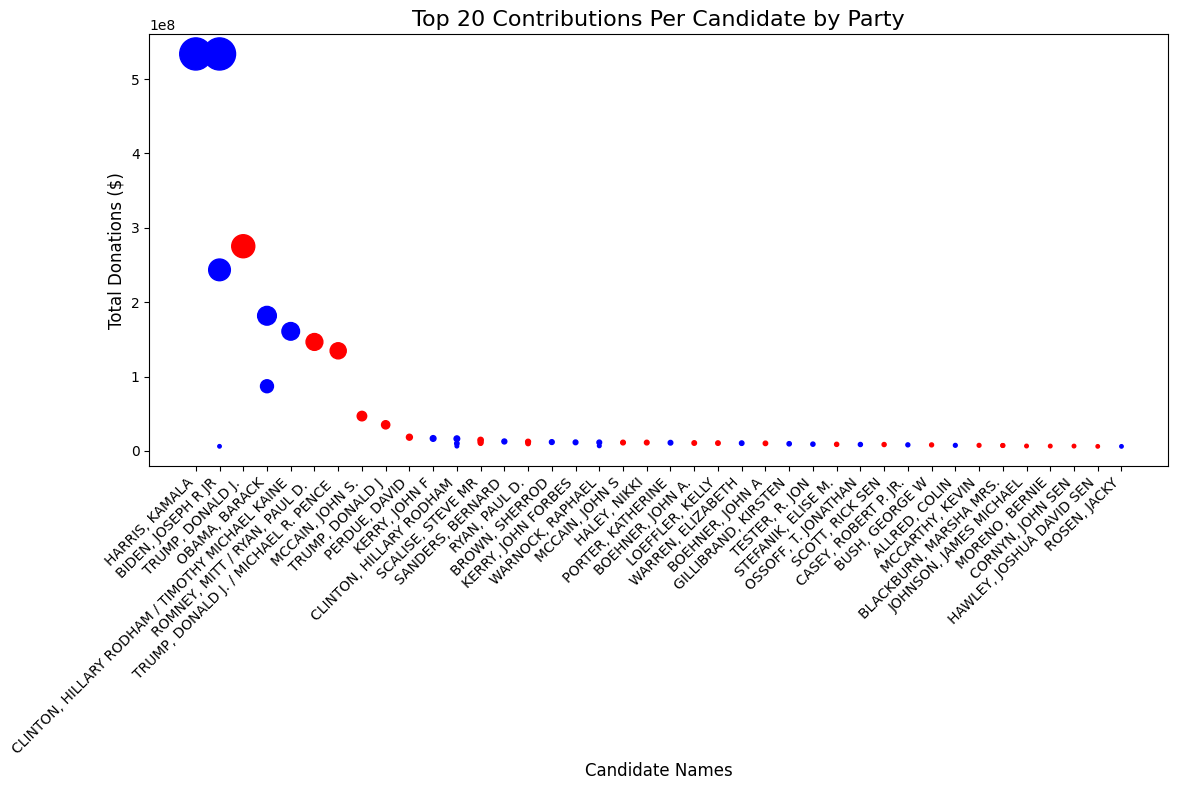

In [21]:

#top candidate refunds
financial_df['Total_Refunds'] = financial_df[28] + financial_df[29]
max_refund_candidate = financial_df.sort_values(by='Total_Refunds', ascending=False).head(10)
print("Candidate who refunded the most money:")
print(max_refund_candidate)

#Count the number of candidates per party
party_counts = financial_df[4].value_counts()
top_10_parties = party_counts.head(10)
# Plot the bar chart for top 10 parties
plt.figure(figsize=(10, 6))
plt.bar(top_10_parties.index, top_10_parties.values, color=['red', 'blue', 'gray', 'green'])
# Add titles and labels
plt.title('Top 10 Parties Represented by Candidates', fontsize=16)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

#Scatter plot to visualize top 50 donated candidates and their party affiliations
scatter_data = financial_df[[1, 4, 6]].copy()
scatter_data.columns = ['Candidate', 'Party', 'Total_Donations']
scatter_data['Total_Donations'] = pd.to_numeric(scatter_data['Total_Donations'], errors='coerce').fillna(0) #typecast to int
scatter_data = scatter_data.dropna(subset=['Party']) #drop rows missing party data
party_colors = {'DEM': 'blue', 'REP': 'red'}
scatter_data['Color'] = scatter_data['Party'].map(party_colors).fillna('gray')
top_candidates = scatter_data.sort_values(by='Total_Donations', ascending=False).head(50) #sort by top 50
plt.figure(figsize=(12, 8))
plt.scatter(
    top_candidates['Candidate'],
    top_candidates['Total_Donations'],
    s=top_candidates['Total_Donations']/1000000,
    c=top_candidates['Color']
)
plt.title('Top 20 Contributions Per Candidate by Party', fontsize=16)
plt.xlabel('Candidate Names', fontsize=12)
plt.ylabel('Total Donations ($)', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.tight_layout()
plt.show()
